# Novel COVID 19 Spread Analysis and Forecast

# About the Data
Coronaviruses are a large family of viruses which may cause illness in animals or humans. 
In humans, several coronaviruses are known to cause respiratory infections ranging from the 
common cold to more severe diseases such as Middle East Respiratory Syndrome (MERS) and 
Severe Acute Respiratory Syndrome (SARS). 

The most recently discovered coronavirus causes coronavirus disease COVID-19 - World Health Organization

The number of new cases are increasing day by day around the world. 


# A big thank you to Johns Hopkins for providing the data.

In [65]:
#Importing needed packages
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd 
import random
import math
import time
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator
plt.style.use('seaborn')
%matplotlib inline

In [138]:
#reading the datsets from the location
confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv')
recoveries = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv')

In [139]:
#Observing first few records
confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,53,59,70,75,82,114,147,177,212,272
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,581,639,639,701,773,839,825,878,889,924
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,160,178,178,200,212,226,243,266,313,345
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,129,149,149,197,238,428,566,673,790,900


In [151]:
#Finding out the date keys
cols = confirmed.keys()

In [141]:
#Taking only count columns- cases by date
confirmed = confirmed.loc[:, cols[4]:cols[-1]]
deaths = deaths.loc[:, cols[4]:cols[-1]]
recoveries = recoveries.loc[:, cols[4]:cols[-1]]

In [142]:
#Creating different lists and computing different sum
dates = confirmed.keys()
world_cases = []
total_deaths = [] 
mortality_rate = []
recovery_rate = [] 
total_recovered = [] 
total_active = [] 

for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    mortality_rate.append(death_sum/confirmed_sum)
    recovery_rate.append(recovered_sum/confirmed_sum)
    total_recovered.append(recovered_sum)
    total_active.append(confirmed_sum-death_sum-recovered_sum)

In [143]:
#Checking important metrices
print(f'Confirmed COVID 2019 cases in World till 19th March:', confirmed_sum)
print("\n")
print(f'Cured COVID 2019 cases in World till 19th March:', recovered_sum)
print("\n")
print(f'Death due to COVID 2019 cases in World till 19th March:', death_sum)

Confirmed COVID 2019 cases in World till 19th March: 242708


Cured COVID 2019 cases in World till 19th March: 84854


Death due to COVID 2019 cases in World till 19th March: 9867


In [155]:
#Finding list of days passed since 22nd jan 2020
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)


#Creating list of world cases for forecasting purposes
world_cases = np.array(world_cases).reshape(-1, 1)

# Future Forecasting

In [145]:
#Forecasting for 10 days in future - creating list upto 67 days
days_in_future = 10
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)


adjusted_dates = future_forcast[:-10]

In [158]:
#Creating string of dates for ploting purpose
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

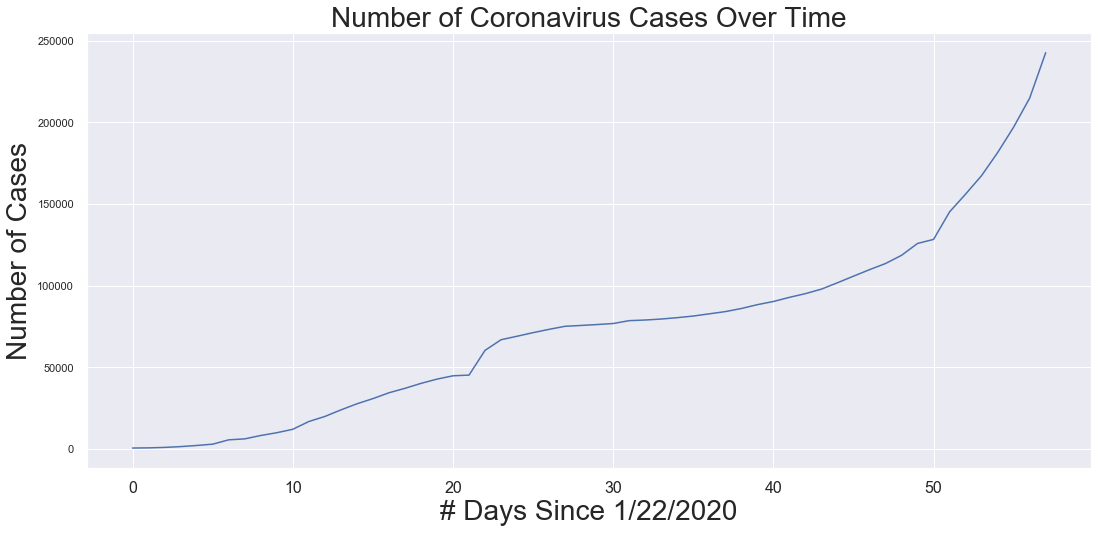

In [163]:
#Plotting the total cases
plt.figure(figsize=(18, 8))
plt.plot(adjusted_dates, world_cases)
plt.title('Number of Coronavirus Cases Over Time', size=28)
plt.xlabel('# Days Since 1/22/2020', size=28)
plt.ylabel('Number of Cases', size=28)
plt.xticks(size=16)
plt.show()

In [164]:
#breaking the data in test and train
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, world_cases, test_size=0.15, shuffle=False)

# Trying with a linear model - It will not fit well, we know :(

In [175]:
#Training the regression model
COVID_linear_model = LinearRegression(normalize=True)
COVID_linear_model.fit(X_train_confirmed, y_train_confirmed)

#Predicting on test
test_linear_pred = COVID_linear_model.predict(X_test_confirmed)


#calculating error for the model
print('MSE:',mean_squared_error(test_linear_pred, y_test_confirmed))

MSE: 2881068380.8446946


In [176]:
#Checking the differnce
test_linear_pred

array([[119200.48214286],
       [121744.44918367],
       [124288.41622449],
       [126832.38326531],
       [129376.35030612],
       [131920.31734694],
       [134464.28438776],
       [137008.25142857],
       [139552.21846939]])

In [177]:
#Checking the actuals
y_test_confirmed

array([[125865],
       [128343],
       [145193],
       [156094],
       [167446],
       [181527],
       [197142],
       [214910],
       [242708]], dtype=int64)

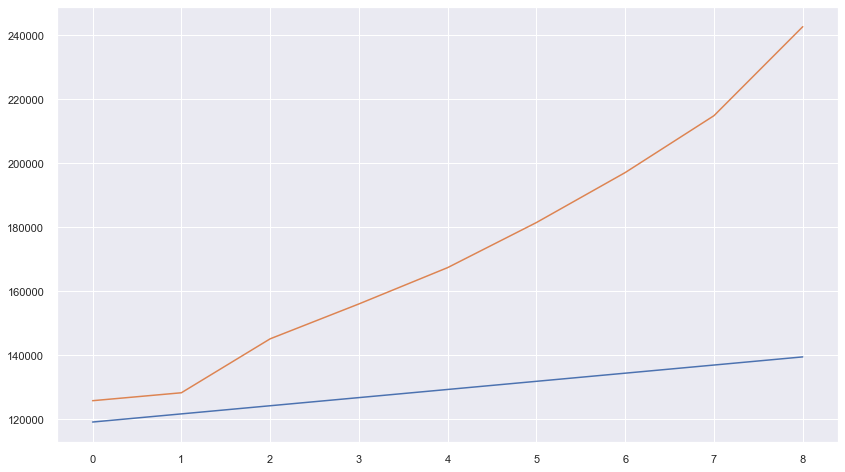

In [178]:
plt.figure(figsize=(14, 8))
plt.plot(test_linear_pred)
plt.plot(y_test_confirmed)

# Trying with an SVM Model

In [191]:
# svm_confirmed - Training the model = Got the hyperparaetrs after tuning in background
svm_model = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=5, C=0.1)
svm_model.fit(X_train_confirmed, y_train_confirmed)

SVR(C=0.1, cache_size=200, coef0=0.0, degree=5, epsilon=1, gamma=0.01,
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

MAE: 31848.57949839592
MSE: 1031875611.699894


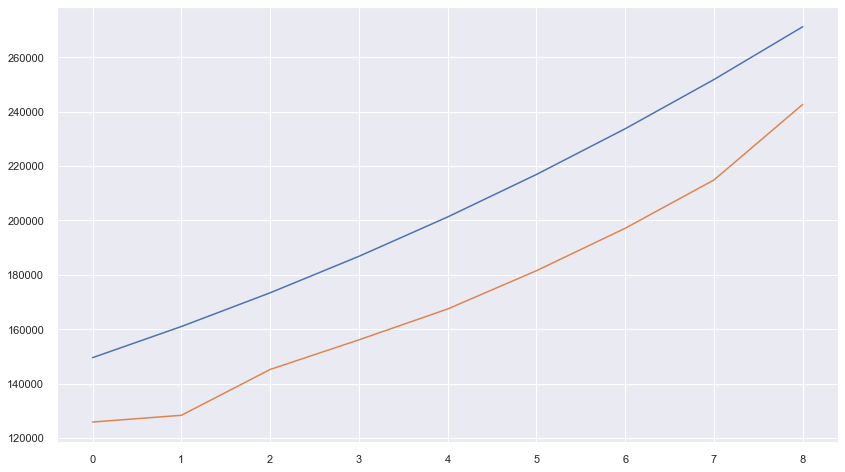

In [192]:
# check against test data
svm_test_pred = svm_model.predict(X_test_confirmed)
plt.figure(figsize=(14, 8))
plt.plot(svm_test_pred)
plt.plot(y_test_confirmed)
print('MAE:', mean_absolute_error(svm_test_pred, y_test_confirmed))
print('MSE:',mean_squared_error(svm_test_pred, y_test_confirmed))

In [193]:
#Predicting for future
svm_pred = svm_model.predict(future_forcast)

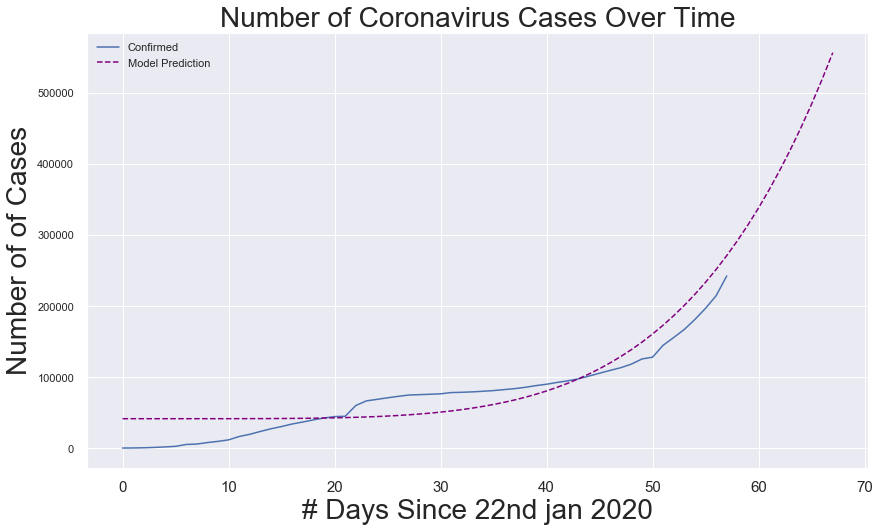

In [194]:
plt.figure(figsize=(14, 8))
plt.plot(adjusted_dates, world_cases)
plt.plot(future_forcast, svm_pred, linestyle='dashed', color='purple')
plt.title('Number of Coronavirus Cases Over Time', size=28)
plt.xlabel('# Days Since 22nd jan 2020', size=28)
plt.ylabel('Number of of Cases', size=28)
plt.legend(['Confirmed', 'Model Prediction'])
plt.xticks(size=15)
plt.show()

# Precautions We must take

# Wash your hands frequently

# Maintain social distancing

# Avoid touching eyes, nose and mouth

# Lets not panic and fight it together